Name - Srushtee Pawar

# Data Loading


In [ ]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Getting data from the dtive
datapath = '/content/drive/MyDrive/Colab Notebooks/Mini project 1/netflix_titles.csv'


# Reading data

In [ ]:
#Importing Pandas and Numpy libraries for data manipulation and analysis in Python.
import pandas as pd
import numpy as np

In [ ]:
#Reading CSV data
df= pd.read_csv(datapath)

In [ ]:
#the top 5 rows of dataset
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#the rows, column names and data types info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#size of the data
print('Number of rows and columns:', df.shape)

Number of rows and columns: (8807, 12)


In [ ]:
# Display the first 3 rows  and the last 3 rows.
print(df.head(2), '\n\n')
print(df.tail(2))

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   

                                         listed_in  \
0                                    Documentaries   
1  International TV Shows, TV Dramas, TV Mysteries   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...   


     show_id   type   title      director  \
8805   s8806  Movie    Zoom  Peter Hewitt   
8806   s8

# Data Cleaning

In [ ]:
#checking the null values
df.isnull().sum()
#Below table shpeing count of missing values in each category.
#"Director" leads with the most nulll values, followed by "cast" and "country".

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# convert the empty strings with appropriate values
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')
df['country'] = df['country'].fillna('No Data')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])  #fillING missing values in the 'date_added' column with the most frequent (mode) date from the same column.
df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) #fillING missing values in the 'rating' column with the most frequent (mode) rating from the same column.
df['duration'] = df['duration'].fillna('No Data')

In [ ]:
##checking the null values again to make sure dataset doesn't contain any null value
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#lets check for duplicate values in the dataset
df.duplicated().sum()
# There are no duplicates available in dataset

0

# Data Exploration

In [ ]:
#a quick statistical summary of every column that can be interpreted as numbers.
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Range of release year : 1925-2021
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [ ]:
#which types are available in 'type' column
## Let's look at the distribution of "Movie", "TV Show" in the "type" column.
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
#Importing Library for data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='type'>

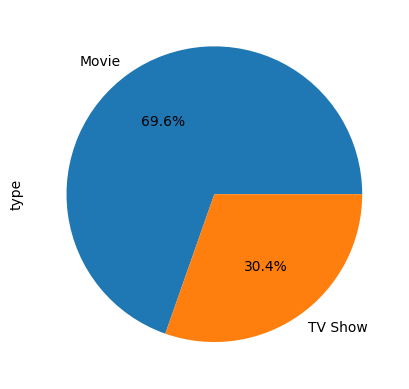

In [ ]:
df['type'].value_counts().plot(kind="pie", autopct='%1.1f%%')
# 7 out 10 peoples prefer to watch Movies rather than TV Show

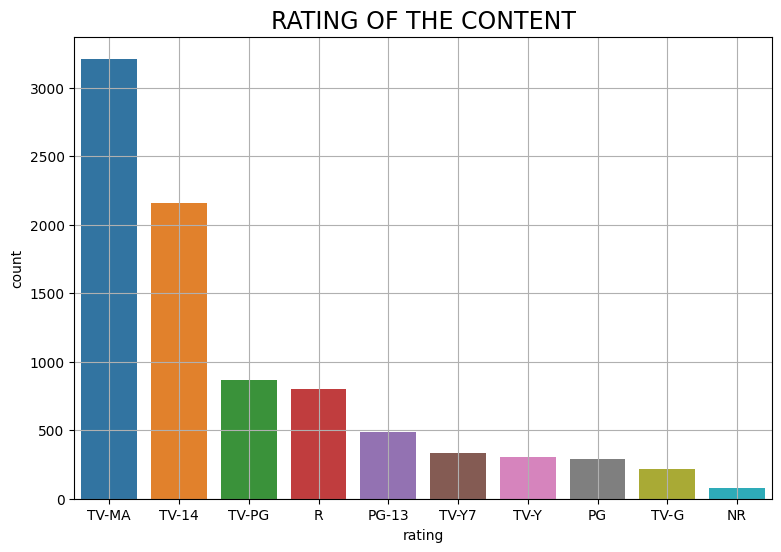

In [ ]:
#rating of most of the content on Netflix
# Count values of the rating column of the dataset.
df.rating.value_counts()
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=df)
plt.title('RATING OF THE CONTENT',fontsize=17)
plt.grid(True)
plt.show()

# TV-MA has the highest rating

In [ ]:
# @title
#Who cast most of the contents on the Netflix ?
df['cast'].value_counts().head(20)

#The most hired cast on the Netflix is David Attenborough

No Data                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
David Spade, London Hughes, Fortune Feimster                                                                                6
Kevin Hart                                                                                                            

In [ ]:
#the duration of most of the shows on the Netflix
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: duration, Length: 221, dtype: int64

# Analyzes/Summarizes the data in two different ways

#Question 1 - What is the is the popular choice for most of directors while choosing a genre of tv shows or movies?

In [ ]:
# number of movies or tv shows made by directors
df['director'].value_counts()

No Data                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [ ]:
#lets remove data for which director names are not given and make new subset of data in which director names are given
new_data = df[df['director'] != 'No Data']


In [ ]:
#check the number of rows after creating subset
new_data.shape

(6173, 12)

In [ ]:
# Group by 'director' and 'listed_in', count occurrences, and fill missing values with 0
grouped_data = new_data.groupby(['director', 'listed_in']).size()

# Sort the result in descending order based on the counts
sorted_data = grouped_data.sort_values(ascending=False)
sorted_data

director                     listed_in                                       
Raúl Campos, Jan Suter       Stand-Up Comedy                                     18
Rajiv Chilaka                Children & Family Movies                            18
Marcus Raboy                 Stand-Up Comedy                                     15
Jay Karas                    Stand-Up Comedy                                     13
Jay Chapman                  Stand-Up Comedy                                     11
                                                                                 ..
Husam El-Gohari              Dramas, International Movies                         1
                             Comedies, International Movies                       1
Hugues Nancy, Fabien Beziat  Documentaries, International Movies                  1
Hugo Stuven                  Dramas, Independent Movies, International Movies     1
Şenol Sönmez                 Comedies, International Movies, Romantic Movies      

Text(0.5, 1.0, 'Top Directors and Listed In Combinations')

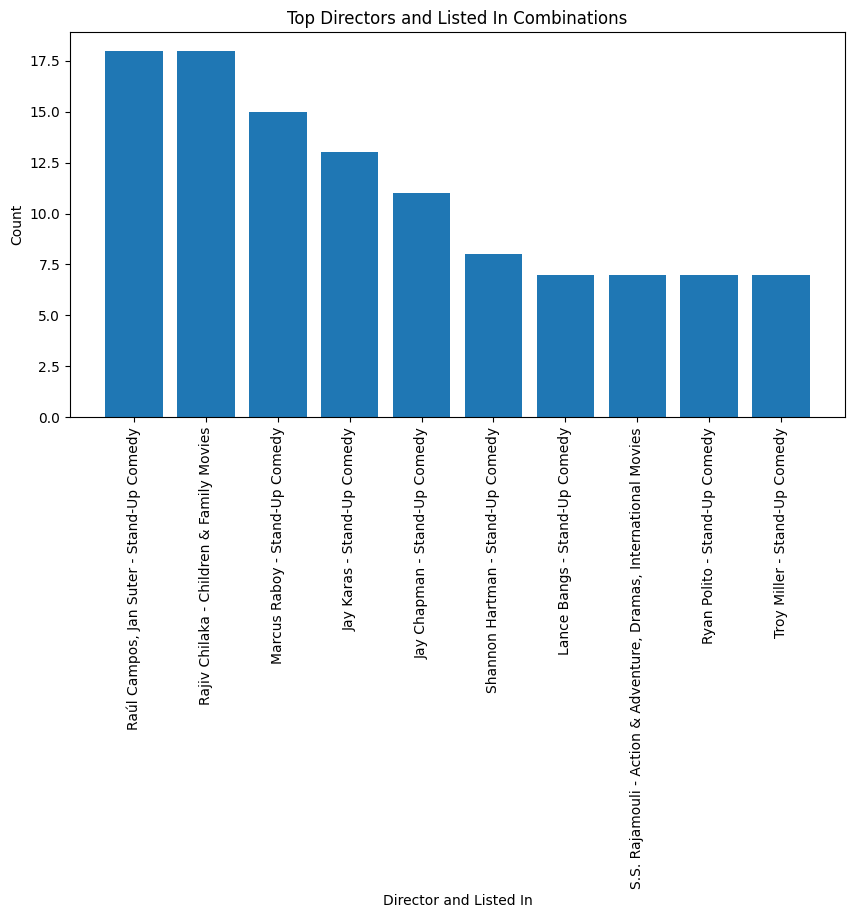

In [ ]:
#Plot the graph showing 'director' and 'listed_in', count occurrences
plt.figure(figsize=(10,5))

#top 10 combinations
top_sorted_data = sorted_data.head(10)

# Combine 'director' and 'listed_in' into a single string
x_labels = [f"{director} - {listed_in}" for director, listed_in in top_sorted_data.index]


plt.bar(x_labels, top_sorted_data)

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Director and Listed In')
plt.ylabel('Count')
plt.title('Top Directors and Listed In Combinations')



* The result shows that "Stand-Up Comedy" is the popular choice for most
directors, with 18 directors choosing this genre.
* "Children & Family Movies" is also a popular choice among directors, with 18 directors selecting it.
* The data provides a comprehensive list of directors and their genre preferences, showcasing the diversity of genre choices among directors.



# Q2  Comapare the growth in production of Movies and TV Shows of the Netflix  over the years for the United States and identify the categories of content that are most prevalent on Netflix in the USA

In [ ]:
# Check the countries in the data and the number of movies or TV shows from those countries on Netflix
df['country'].value_counts()
#Most movie producer country is USA.

United States                             2818
India                                      972
No Data                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

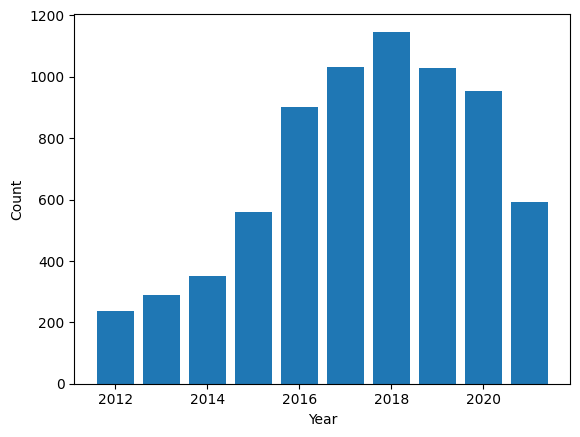

In [ ]:
#check the number of movies or TV shows released over the years
# Extract column release_year from the datatset.
release_year = df['release_year'].value_counts().sort_values(ascending = False).head(10)
release_year

plt.bar(release_year.index, release_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#In this graph, the decrease in 2021 is due to the fact that 2021 and the first 9 months of 2021 cover the first 9 months.

In [ ]:
#Lets check the number of movies or TV shows released over the years in the USA
#Lets create a subset of USA Data
USA_data = df[df['country'] == 'United States'][['release_year','type']].value_counts().sort_values(ascending = False).reset_index(name="count")
print(USA_data)

     release_year     type  count
0            2017    Movie    284
1            2018    Movie    246
2            2019    Movie    217
3            2016    Movie    210
4            2020    Movie    177
..            ...      ...    ...
98           1946    Movie      1
99           1947    Movie      1
100          1962    Movie      1
101          1946  TV Show      1
102          1995  TV Show      1

[103 rows x 3 columns]


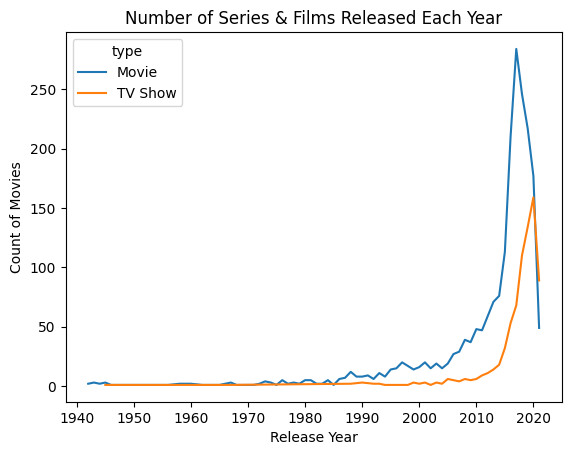

In [ ]:
# plot the time series graph

sns.lineplot(data=USA_data, x="release_year", y="count", hue="type")

# Label the axes and title
plt.xlabel('Release Year')
plt.ylabel('Count of Movies')
plt.title('Number of Series & Films Released Each Year')

plt.grid(False)  # Show gridlines

plt.xticks(rotation=0)

plt.show()





*   The graph reveals the number of movies and TV shows released each year from 1950 to 2020
*   It shows that the number of both movies and TV shows released has been increasing in recent years, with a significant uptick in the number of TV shows released starting in the 2000s
*   Overall, the graph demonstrates the increasing trend in the number of movies and TV shows released each year, with TV shows gaining prominence over time.





In [ ]:
# Most popular category in USA is Documentaries, Stand-Up Comedy, Children & Family Movies

USA_cat = df[df['country'] == 'United States']['listed_in'].value_counts().sort_values(ascending = False).head(10).reset_index(name="count")
USA_cat

,index,count
0,Documentaries,249
1,Stand-Up Comedy,209
2,"Children & Family Movies, Comedies",90
3,Dramas,88
4,Comedies,84
5,Children & Family Movies,80
6,Kids' TV,77
7,"Dramas, Independent Movies",74
8,Reality TV,71
9,Action & Adventure,64


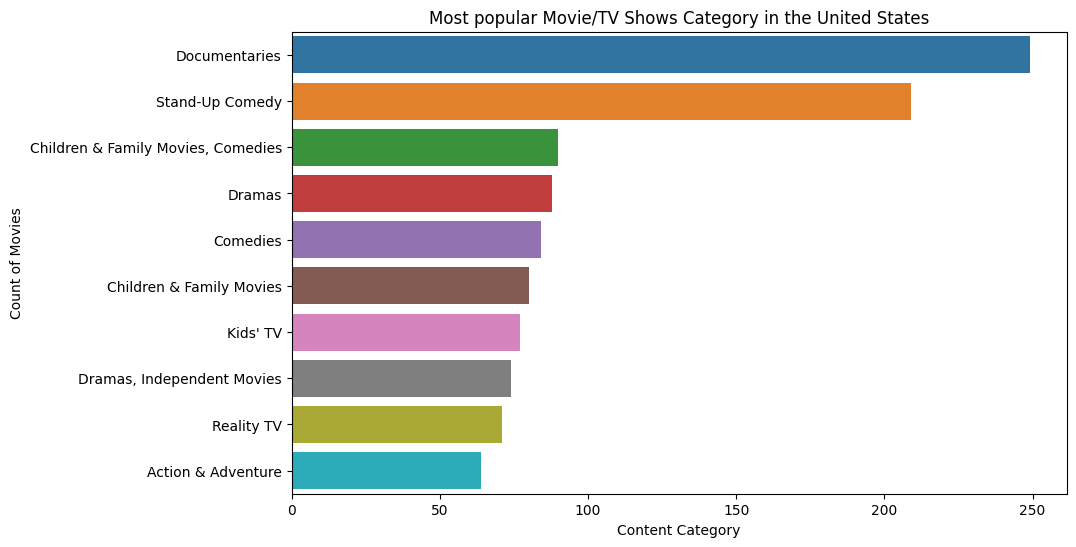

In [ ]:

#plot the graph to check the most popular Movie/TV Shows Category in the United States
plt.figure(figsize=(10, 6))  # Set the figure size

sns.barplot(data=USA_cat, x="count", y="index")


# Label the axes and title
plt.xlabel('Content Category')
plt.ylabel('Count of Movies')
plt.title('Most popular Movie/TV Shows Category in the United States')

plt.grid(False)  # Show gridlines

plt.xticks(rotation=0) # to rotate legends

plt.show()


*   Documentary is the most popular movie and TV show category in the United States followed by Stand-up comedy

